In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'/Users/sumitkumar/Documents/CloudyData/Python/Pandas/ai_financial_market_analysis.csv')
data

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [5]:
finance=data.copy()

In [6]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [8]:
finance['Date']=pd.to_datetime(finance['Date'])

In [9]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


## How much amount the companies spent on R & D ?

In [13]:
spent=finance.groupby('Company')['R&D_Spending_USD_Mn'].sum()
spent

Company
Google    423341.14
Meta      264533.07
OpenAI     26482.77
Name: R&D_Spending_USD_Mn, dtype: float64

### Revenue Earned by the companies

In [16]:
revenue=finance.groupby('Company')['AI_Revenue_USD_Mn'].sum()
revenue


Company
Google    284498.38
Meta      189621.82
OpenAI      9462.89
Name: AI_Revenue_USD_Mn, dtype: float64

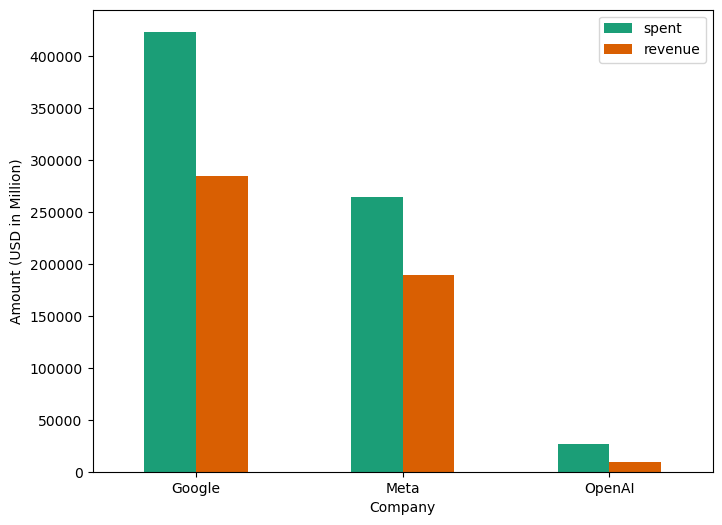

In [275]:
combine=pd.DataFrame({"spent":spent,"revenue":revenue})
colors=sns.color_palette('Dark2',len(combine))
combine.plot(kind='bar',color=colors,figsize=(8,6))
plt.xticks(rotation=0)
plt.ylabel('Amount (USD in Million)')
plt.show()

### Datewise Impact on the Stock

In [40]:
finance['Year']=pd.to_datetime(finance['Date']).dt.year
finance.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [47]:
stock_impact=finance[['Date','Stock_Impact_%']]
stock_impact

,Date,Stock_Impact_%
0,2015-01-01,-0.36
1,2015-01-02,0.41
2,2015-01-03,0.23
3,2015-01-04,0.93
4,2015-01-05,-0.09
...,...,...
10954,2024-12-27,-0.66
10955,2024-12-28,-0.57
10956,2024-12-29,-0.52
10957,2024-12-30,0.22


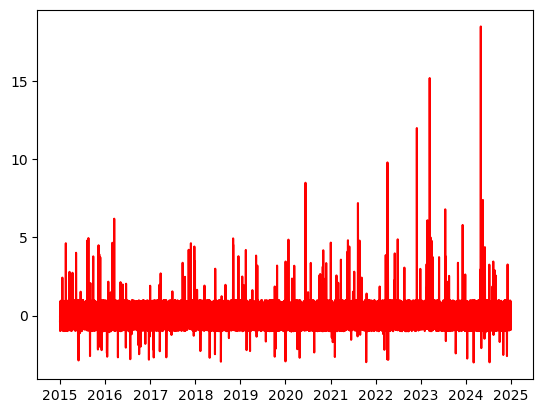

In [248]:
plt.plot(finance['Date'],finance['Stock_Impact_%'],color='red')
plt.show()

### Create 3 separate dataframes and compare Stock_impact% over Years 

In [60]:
finance['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [65]:
OPenAI_frame= finance[(finance['Company']=='OpenAI')]
OPenAI_frame

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


In [68]:
Google_frame= finance[finance['Company']=='Google']
Google_frame

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


In [69]:
Meta_frame= finance[finance['Company']=='Meta']
Meta_frame

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


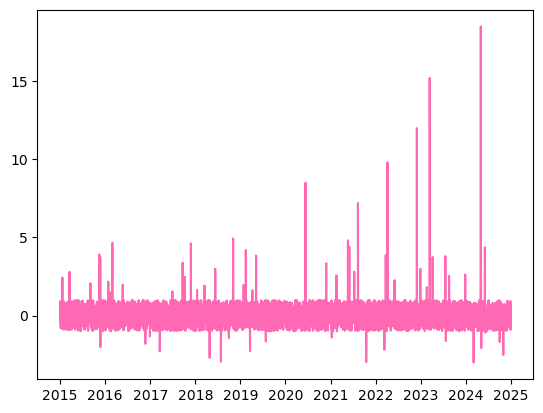

In [246]:
plt.plot(OPenAI_frame['Date'],OPenAI_frame['Stock_Impact_%'],color='hotpink')
plt.show()

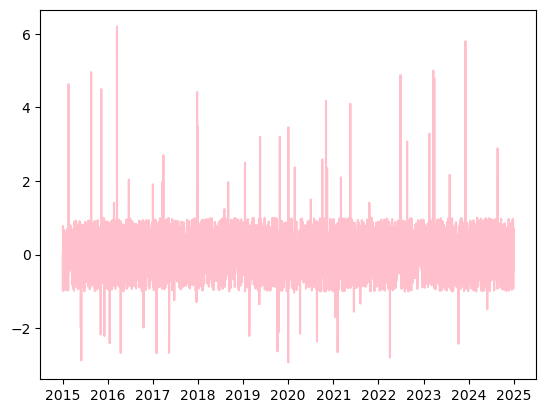

In [241]:
plt.plot(Google_frame['Date'],Google_frame['Stock_Impact_%'],color='pink')
plt.show()

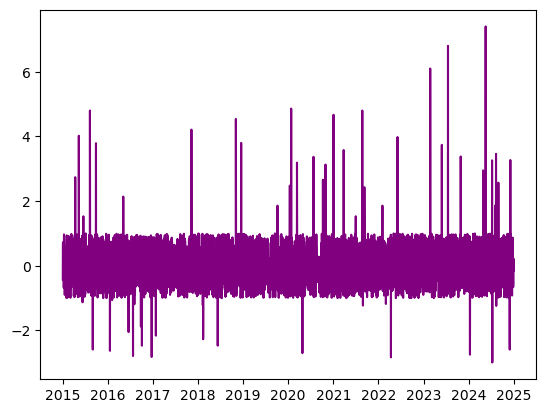

In [244]:
plt.plot(Meta_frame['Date'],Meta_frame['Stock_Impact_%'],color='purple')
plt.show()

### Events when Maximum Stock Impact was observe

In [81]:
finance.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [99]:
x=OPenAI_frame['Stock_Impact_%'].max()
x

18.5

In [100]:
OPenAI_frame[OPenAI_frame['Stock_Impact_%']==x]['Event']

3408    GPT-5 release (predicted)
Name: Event, dtype: object

In [105]:
z=Google_frame['Stock_Impact_%'].max()
z

6.2

In [106]:
Google_frame[Google_frame['Stock_Impact_%']==z]['Event']

4092    AlphaGo beats Lee Sedol
Name: Event, dtype: object

In [101]:
y=Meta_frame['Stock_Impact_%'].max()
y

7.4

In [102]:
Meta_frame[Meta_frame['Stock_Impact_%']==y]['Event']

10731    LLaMA 3 release (predicted)
Name: Event, dtype: object

In [ ]:
AI Revenue Growth of the companies

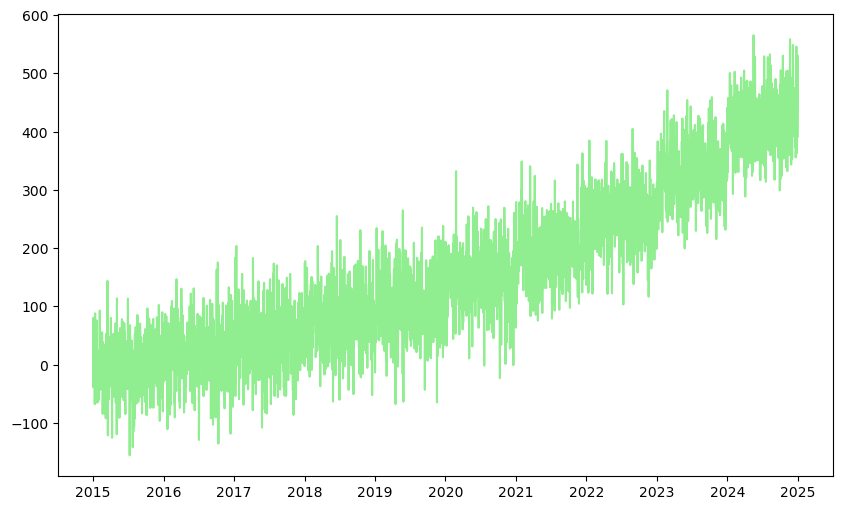

In [235]:
plt.figure(figsize=(10,6))
plt.plot(OPenAI_frame['Date'],OPenAI_frame['AI_Revenue_Growth_%'],color='lightgreen')
plt.show()

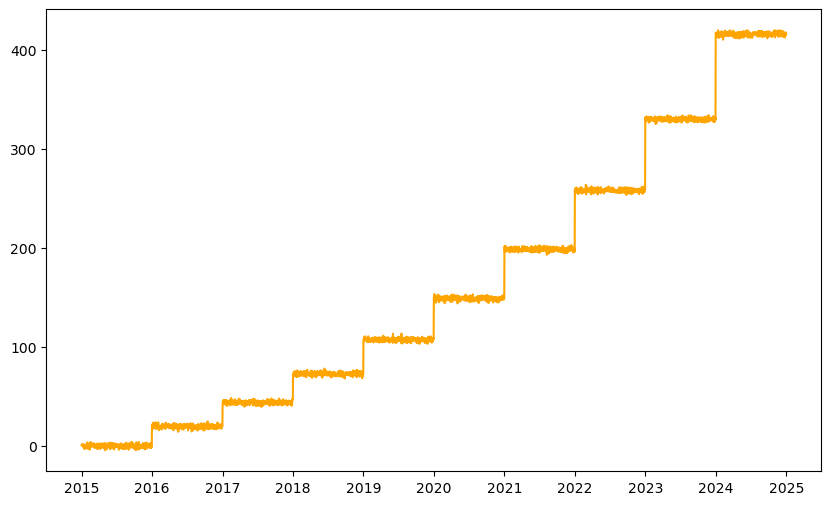

In [234]:
plt.figure(figsize=(10,6))
plt.plot(Google_frame['Date'],Google_frame['AI_Revenue_Growth_%'],color='orange')
plt.show()

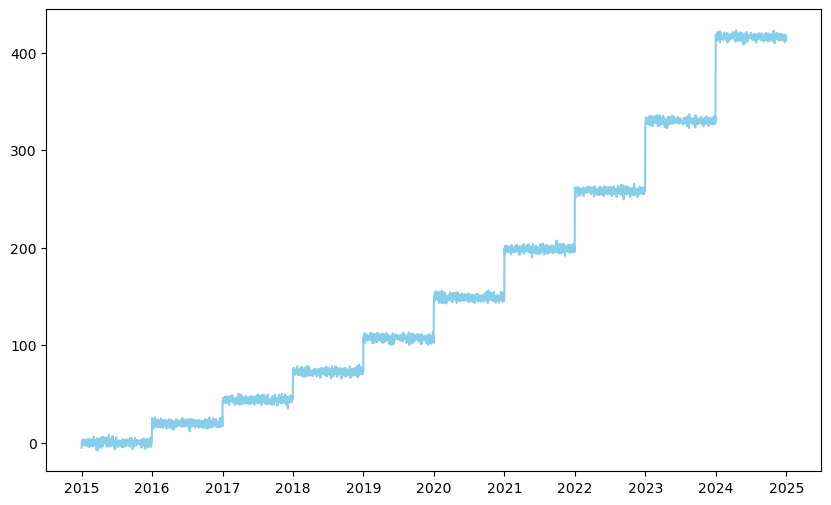

In [233]:
plt.figure(figsize=(10,6))
plt.plot(Meta_frame['Date'],Meta_frame['AI_Revenue_Growth_%'],color='skyblue')
plt.show()

### Correlation between the columns

<Axes: >

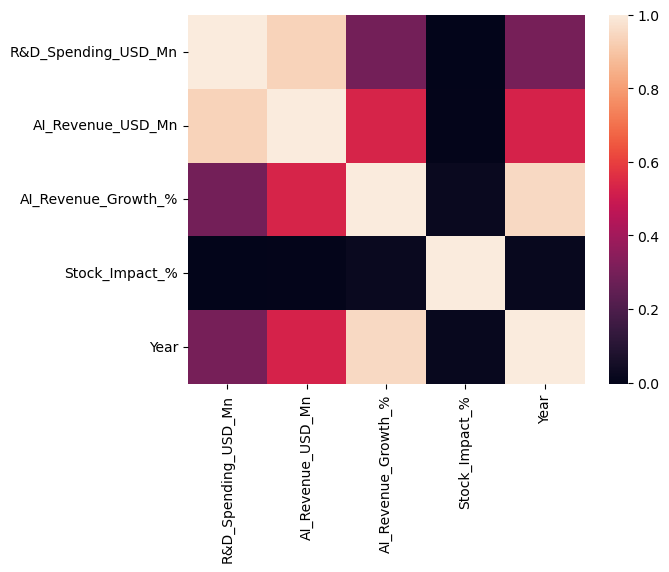

In [118]:
sns.heatmap(finance.corr(numeric_only=True))

### Expenditure vs Revenue year-by-year

In [145]:
Expenditure=finance.groupby('Year')['R&D_Spending_USD_Mn'].sum()
Expenditure

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

In [122]:
Revenue=finance.groupby('Year')['AI_Revenue_USD_Mn'].sum()
Revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

In [146]:
mix=Expenditure.to_frame().join(Revenue.to_frame(),how='inner')
mix

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn
Year,,
2015,49304.23,18623.21
2016,53349.94,22361.20
2017,57475.12,26776.80
2018,62002.16,32164.44
2019,67071.51,38580.32
2020,72602.53,46456.19
2021,78207.32,55591.14
2022,84390.17,66674.24
2023,91193.92,80041.64


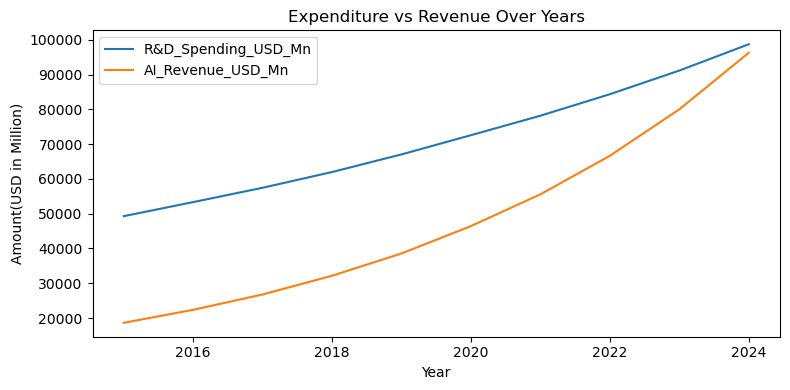

In [222]:
mix.plot(kind='line',figsize=(8,4))
plt.title('Expenditure vs Revenue Over Years')
plt.ylabel('Amount(USD in Million)')
plt.tight_layout()
plt.show()

### Event Impact Analysis

In [161]:
finance['Event'].value_counts()

Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [162]:
finance[finance['Event']=='Gemini AI release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.8,2023


In [165]:
z=finance.loc[6900 : 6928]
z

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
6900,2023-11-22,Google,147.21,128.40,328.01,NaN,0.37,2023
6901,2023-11-23,Google,146.37,129.01,330.02,NaN,-0.01,2023
6902,2023-11-24,Google,148.72,128.75,329.18,NaN,-0.58,2023
6903,2023-11-25,Google,146.89,130.22,334.08,NaN,-0.99,2023
6904,2023-11-26,Google,148.21,129.11,330.36,NaN,0.72,2023
6905,2023-11-27,Google,149.22,128.28,327.61,NaN,0.53,2023
6906,2023-11-28,Google,148.14,128.38,327.92,NaN,-0.95,2023
6907,2023-11-29,Google,149.32,129.05,330.16,NaN,-0.88,2023
6908,2023-11-30,Google,149.54,129.11,330.38,NaN,-0.64,2023
6909,2023-12-01,Google,147.03,129.14,330.46,NaN,0.63,2023


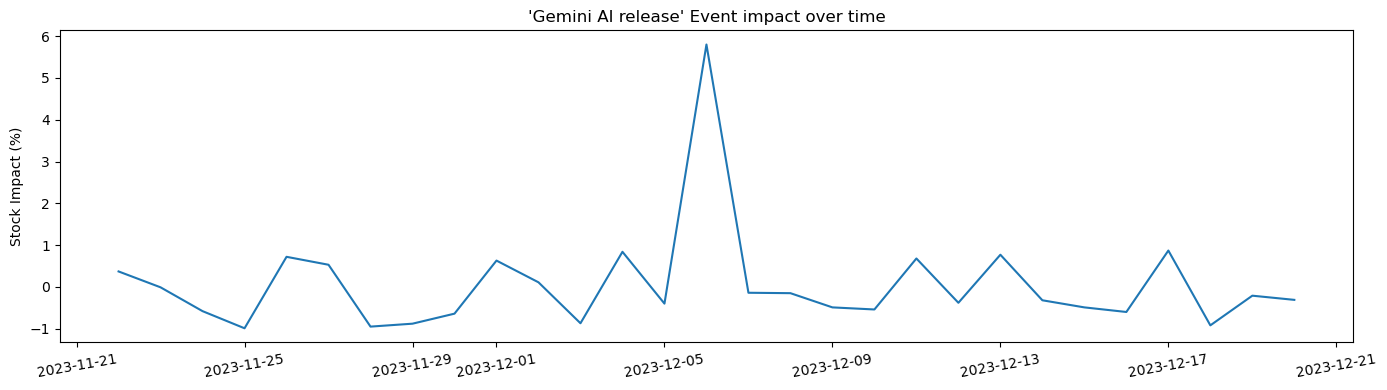

In [216]:
plt.figure(figsize=(14,4))
plt.plot(z['Date'],z['Stock_Impact_%'])
plt.xlabel('')
plt.ylabel('Stock Impact (%)')
plt.title("'Gemini AI release' Event impact over time")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(z['Date'],z['Stock_Impact_%'])
plt.xlabel('')
plt.xticks(rotation=10)
plt.show()

### Change in the index wrt Year & Company

In [197]:
change=finance.groupby(['Company','Year'])['Stock_Impact_%'].mean().reset_index()
change

,Company,Year,Stock_Impact_%
0,Google,2015,-0.030192
1,Google,2016,0.055492
2,Google,2017,0.026795
3,Google,2018,0.068795
4,Google,2019,0.000466
5,Google,2020,-0.000301
6,Google,2021,0.010384
7,Google,2022,0.063671
8,Google,2023,0.045315
9,Google,2024,0.021667


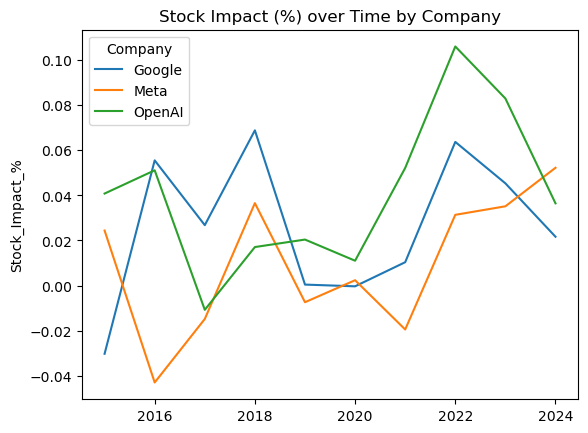

In [207]:
for company in change['Company'].unique():
    company_data = change[change['Company'] == company]
    plt.plot(company_data['Year'], company_data['Stock_Impact_%'], label=company)
    plt.title('Stock Impact (%) over Time by Company')
    plt.ylabel('Stock_Impact_%')
    plt.legend(title='Company')
    
plt.show()